# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

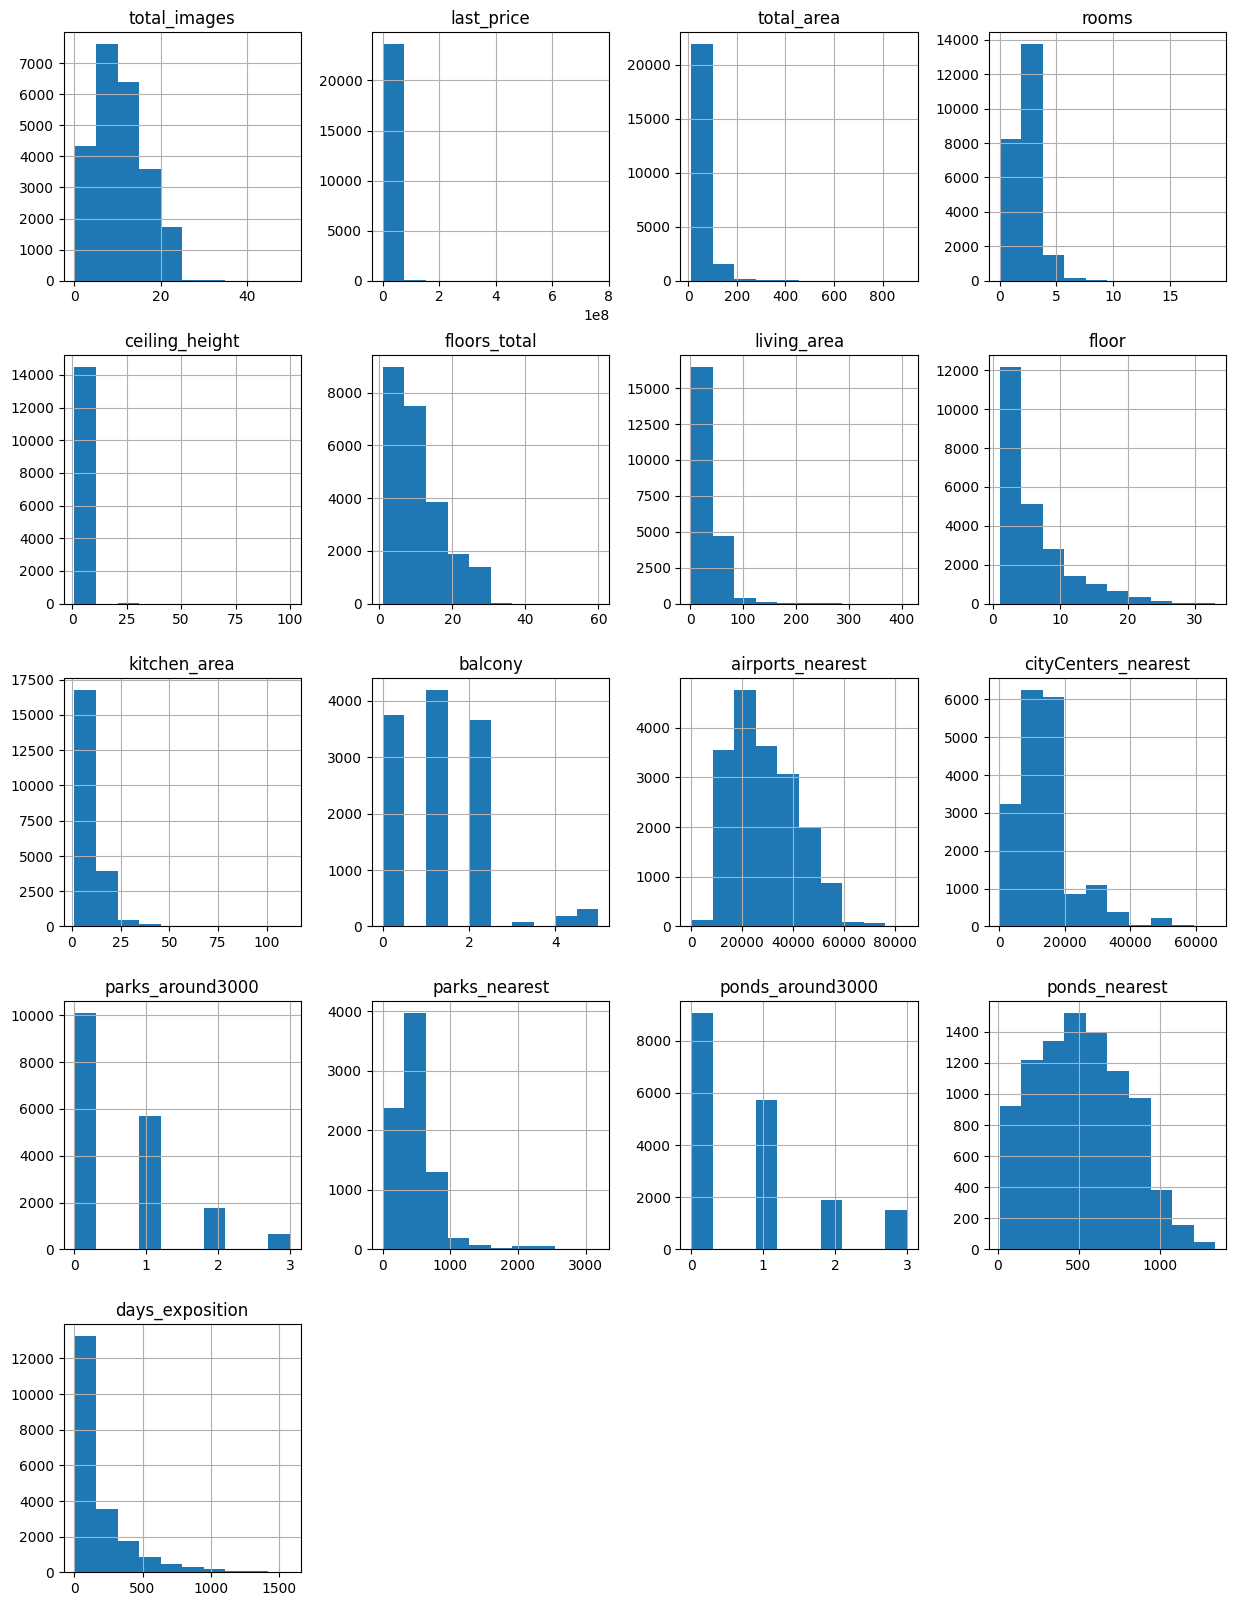

In [5]:
data.hist(figsize=(15, 20))

Вывод:

В результате загрузке была получена информация общяя информация о датафрейме и построены гистограмы по нему. Далее перейдем к предобработке данных: рассмотрим нулевые значения, поищем аномальные значения, попробуем заполнить пропуски, где это возможно. По построенным гистограммам видно, что полученную информации предстоит обработать, так как есть гистограммы почти в один столбец, что может говорить об аномально высоких значениях этих параметров. Также есть гисторгаммы, где уже частично видно распределение квартир по параметрам, например для количества парков и их расположению относительно квартир.

### Выполните предобработку данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Удаление строк

Видим, что пропусков немного в двух колонках, удалим строки с пропусками в них из нашей базы.

In [7]:
print(data['floors_total'].isna().sum())
print(data['locality_name'].isna().sum())
data = data.dropna(subset=['floors_total', 'locality_name'])

86
49


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Замена значений

Посмотрим на данные высот потолков, по ним выберем наиболее подходящее значение и заполним им пропуски. Аномальные значения высот будут рассмотрены позже.

In [9]:
print(f"""минимальная высота потолков: {data['ceiling_height'].min()}\n
максимальная высота потолков: {data['ceiling_height'].max()}\n
средняя высота потолков: {data['ceiling_height'].mean()}\n
медианная высота потолков: {data['ceiling_height'].median()}\n""")

минимальная высота потолков: 1.0

максимальная высота потолков: 100.0

средняя высота потолков: 2.7712830605621157

медианная высота потолков: 2.65



In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Если информация о балконах не указана, их скорее всего нет.

In [11]:
data['balcony'] = data['balcony'].fillna(0.0)

Если информация об апартаменах не указана, это скорее всего не они, сразу поменяем тип данных на bool

In [12]:
print(data['is_apartment'].unique())

[nan False True]


In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
data['is_apartment'] = data['is_apartment'].astype(bool, errors='raise')

Данные спокойно поменялись, raise в errors для контроля правильности заполения

Колонки с информацией из геосервисов можно заполнить по среднему для каждого населенного пункта, кроме СПб, так как в нем разница значительна и может сильно влиять на цену. Поэтому для СПб оставляем информацию незаполненной.

In [15]:
for locality_name in data['locality_name'].unique():
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'airports_nearest'].mean()
    
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'cityCenters_nearest'].mean()
    
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['parks_around3000'].isna()), 'parks_around3000'] = \
    data.loc[(data['locality_name'] == locality_name), 'parks_around3000'].mean()
    
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['parks_nearest'].isna()), 'parks_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'parks_nearest'].mean()
    
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
    data.loc[(data['locality_name'] == locality_name), 'ponds_around3000'].mean()
    
    data.loc[(data['locality_name'] == locality_name) & (data['locality_name'] != 'Санкт-Петербург')
             & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
    data.loc[(data['locality_name'] == locality_name), 'ponds_nearest'].mean()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Данные не заполнились, видимо у некоторых населенных пунктов нет данных из геосервисов, проверим это на примере парков

In [17]:
print(data['locality_name'].nunique()-
      data.pivot_table(index='locality_name', values='parks_nearest').count())


parks_nearest    352
dtype: int64


Таким образом 352 населенных пункта не имеют информации о парках. Оставим информацию из геосервисов как есть. Но так как она должна быть получена автоматически, возможно не доработан процесс получения этих данных, можно порообовать обратиться к тем, кто предоставлял эти данные.

Посмотрим на данные о жилой площади

In [18]:
print(data['living_area'].isna().sum())

1865


Не хватает 1865 строк с данными, жилая плоощадь конечно сильно влияет на стоимость, но удалять большое количество строк тоже нехорошо, поэтому заменим значения жилой площади на среднюю долю общей площади.
Аналогично поступим для кухни.

In [19]:
living_ratio = data['living_area'].mean()/data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(data['total_area']*living_ratio)
kitchen_ratio = data['kitchen_area'].mean()/data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*kitchen_ratio)
print(living_ratio, kitchen_ratio)

0.571173883860648 0.1750745989421607


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [21]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.000000,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.771283,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,573.217105,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.771283,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.000000,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.771283,14.0,90.816648,9,False,...,27.836861,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.000000,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.000000,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.700000,5.0,73.300000,3,False,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.000000,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.771283,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.771283,3.0,29.700000,1,False,...,9.926730,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.000000,17.0,43.837596,12,False,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.000000,602.0


#### Выводы по удалению и замене пропусков

Таким образом, пропуски были заполнены, где это возможно: в колонках жилой площади, площади кухни, высот потолков. Удалены некоторые строки, в которых были пропущены значения для столбцов без информации о населенном пункте(49) и количестве этажей(86). В некоторых строках были оставлены значения Nan, так как их заполнить не представляется возможным на основе имеющихся данных, так как информация из геосервисов неполная. Колонка с длительностью продажи также оставлена с пропусками, так как значений в ней довольно много, как и факторов, влияющих на срок продажи.

#### Изменение типов данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Дата размещения - формат даты и времени, а не объект.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Количетсво этажей - целое число, как и число балконов. Замена int64 на int32 в целом не обязательна, но можно сделать для экономии памяти.
К типу bool приводили ранее колонку is_apartment при заполнении пропусков.

In [24]:
data['floors_total'] = data['floors_total'].astype('int', errors='ignore')
data['balcony'] = data['balcony'].astype('int', errors='ignore')
data['floor'] = data['floor'].astype('int', errors='ignore')
data['total_images'] = data['total_images'].astype('int', errors='ignore')
data['rooms'] = data['rooms'].astype('int', errors='ignore')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int32         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int32         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int32         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Поиск и замена дубликатов

Можно создать список и поискать в нем похожие названия, в результате поменять их на самые часто встечающиеся.

In [26]:
data['locality_name'].nunique()

364

In [27]:
a = sorted(list(data['locality_name'].unique()))
chars = 'Вещево'
b = [t for t in a if chars in t]
print(b)


['поселок станции Вещево', 'посёлок при железнодорожной станции Вещево']


В итоге были найдены и заменены несколько повторяющихся названий.

In [28]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'коттеджный поселок', 'городской поселок'], 'поселок', regex=True)
    .replace(['при железнодорожной станции'], 'станции', regex=True)
) 

In [29]:
data['locality_name'].nunique()

319

Вывод

Были изучены значения в столбце с названиями населенных пунктов. Строка с поиском похожих названий была запущена несколько раз с различными названиями для удобства поиска повторяющихся значений. В результате 45 значений были приведены в соответствие друг с другом.

### Добавьте в таблицу новые столбцы

#### Цена 1 кв.м

In [30]:
data['price_one_meter'] = data['last_price'] / data['total_area']

#### День недели публикации

In [31]:
data['day_of_week_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

#### Месяц публикации объявления

In [32]:
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Год публикации объявления

In [33]:
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Тип этажа

In [34]:
def floor_type(row):
    floor = row['floor']
    floors = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor/floors == 1:
        return 'последний'
    elif floor/floors > 1:
        return 'ошибка'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_type, axis=1)

In [35]:
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


#### Расстояние до центра в км

Так как есть значения NaN, то просто преобразовать в int не получится, поэтому воспользуемся функцией round для округления. В лямбда функции используем проверку на NaN, и если она не пройдена, вернем NaN.

In [36]:
data['city_center_km'] = data['cityCenters_nearest']/1000
data['city_center_km'] = data.apply(lambda row:
                                    round(row['city_center_km']) if row['city_center_km'] == row['city_center_km']
                                    else float('nan'), axis=1)

#### Выводы по добавлению столбцов

Были добавлены новые столбцы с требуемыми параметрами. Для некоторых из них потребовались функции или лямбда-функции, что отражено выше.

### Проведите исследовательский анализ данных

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int32         
 1   last_price               23565 non-null  float64       
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int32         
 5   ceiling_height           23565 non-null  float64       
 6   floors_total             23565 non-null  int32         
 7   living_area              23565 non-null  float64       
 8   floor                    23565 non-null  int32         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 n

#### Анализ общей площади

In [38]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'количество квартир')

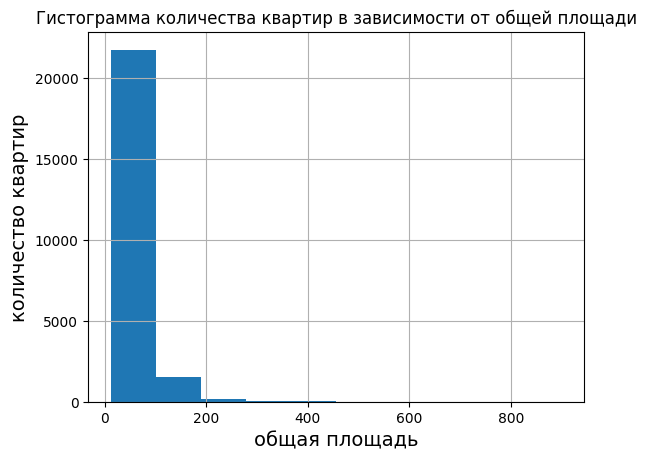

In [39]:
data['total_area'].hist(label='total area')
plt.title("Гистограмма количества квартир в зависимости от общей площади")
plt.xlabel('общая площадь', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Большинство проданных квартир имеют небольшую площадь, рассмотрим их подробнее.

Text(0, 0.5, 'количество квартир')

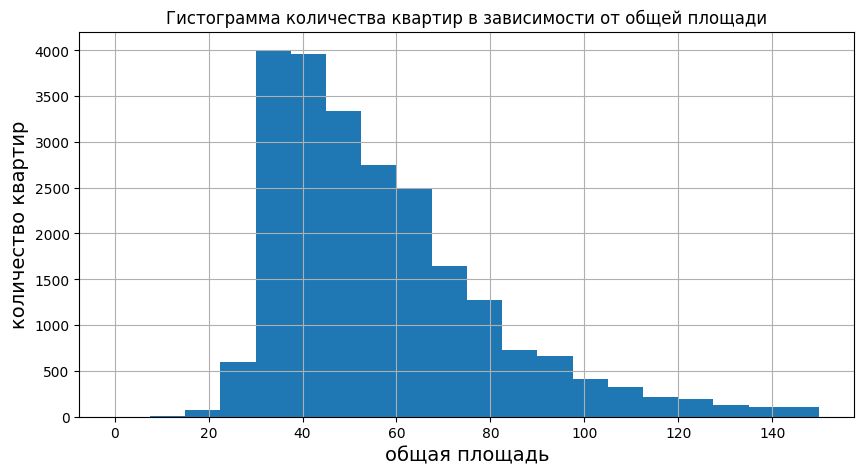

In [40]:
data['total_area'].hist(bins=20, range=(0,150), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от общей площади")
plt.xlabel('общая площадь', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Получили распределение площади квартир с пиком площади в районе 30-50 $м^2$

#### Анализ жилой площади

In [41]:
data['living_area'].describe()

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

Text(0, 0.5, 'количество квартир')

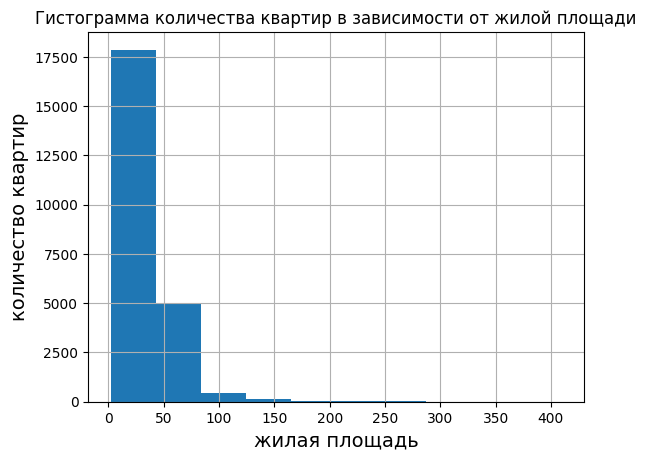

In [42]:
data['living_area'].hist()
plt.title("Гистограмма количества квартир в зависимости от жилой площади")
plt.xlabel('жилая площадь', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

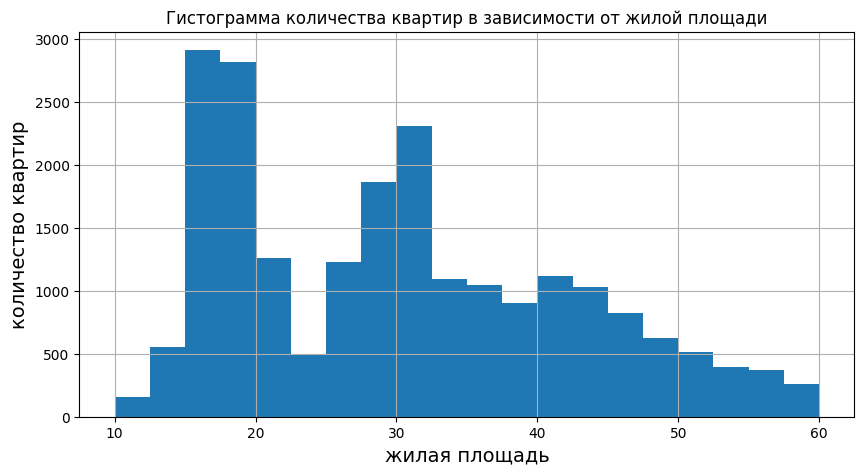

In [43]:
data['living_area'].hist(bins=20, range=(10,60), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от жилой площади")
plt.xlabel('жилая площадь', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Для жилой площади распределение похоже на общую площадь, но есть пик в районе 20 $м^2$, что может быть связано с тем, что при малой площади почти все является жилым.

#### Анализ площади кухни

In [44]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'количество квартир')

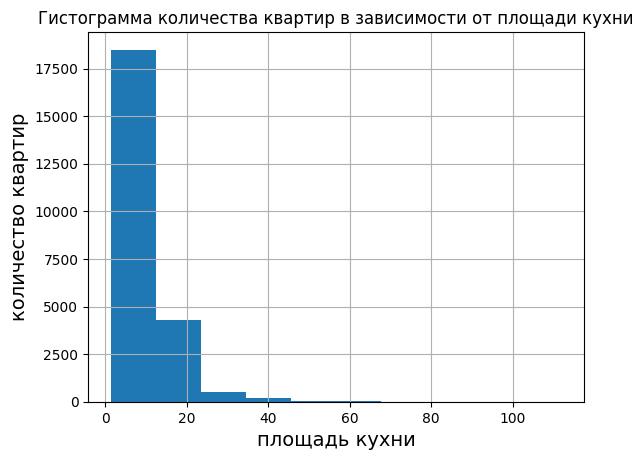

In [45]:
data['kitchen_area'].hist()
plt.title("Гистограмма количества квартир в зависимости от площади кухни")
plt.xlabel('площадь кухни', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

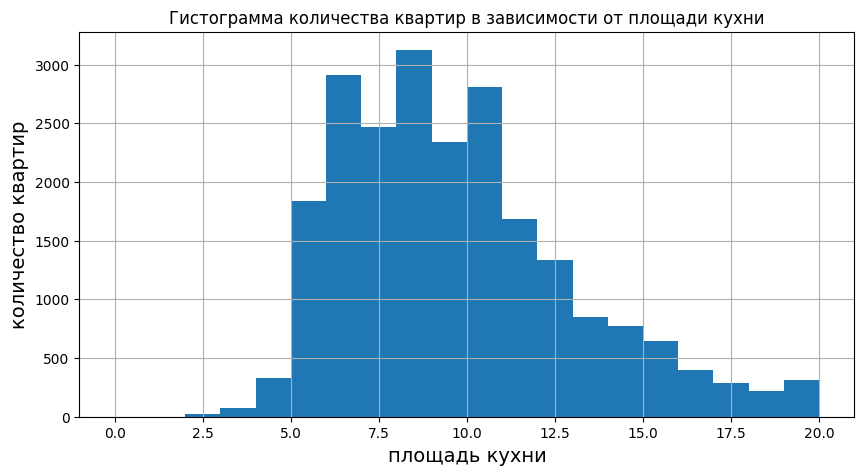

In [46]:
data['kitchen_area'].hist(bins=20, range=(0,20), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от площади кухни")
plt.xlabel('площадь кухни', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Для площади кухни распределение похоже на общую площадь. При этом в основном размеры кухни небольшие, около 10 $м^2$

#### Анализ стоимости

In [47]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Text(0, 0.5, 'количество квартир')

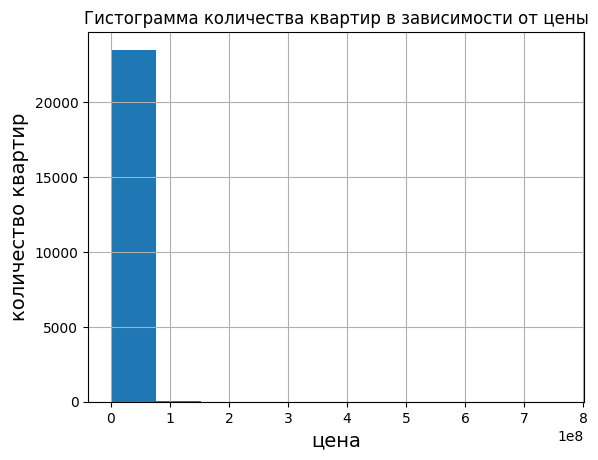

In [48]:
data['last_price'].hist()
plt.title("Гистограмма количества квартир в зависимости от цены")
plt.xlabel('цена', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

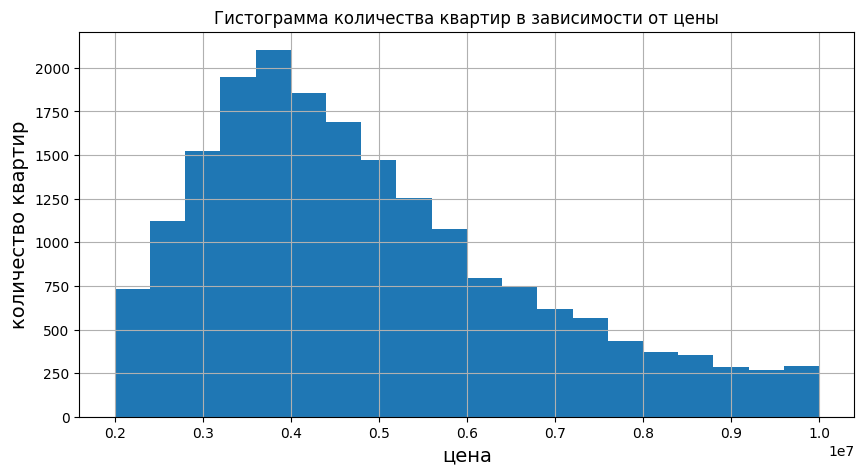

In [49]:
data['last_price'].hist(bins=20, range=(2000000,10000000), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от цены")
plt.xlabel('цена', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Распределение цен имеет пик в районе 4млн, но также остается похожим на распределение пуассона.

#### Анализ количества комнат

In [50]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'количество квартир')

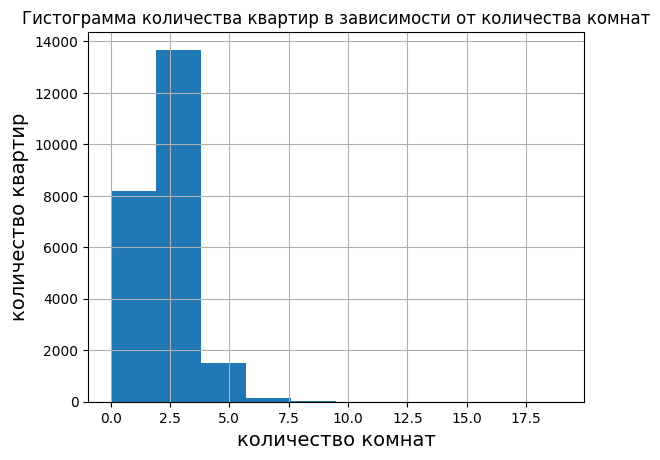

In [51]:
data['rooms'].hist()
plt.title("Гистограмма количества квартир в зависимости от количества комнат")
plt.xlabel('количество комнат', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

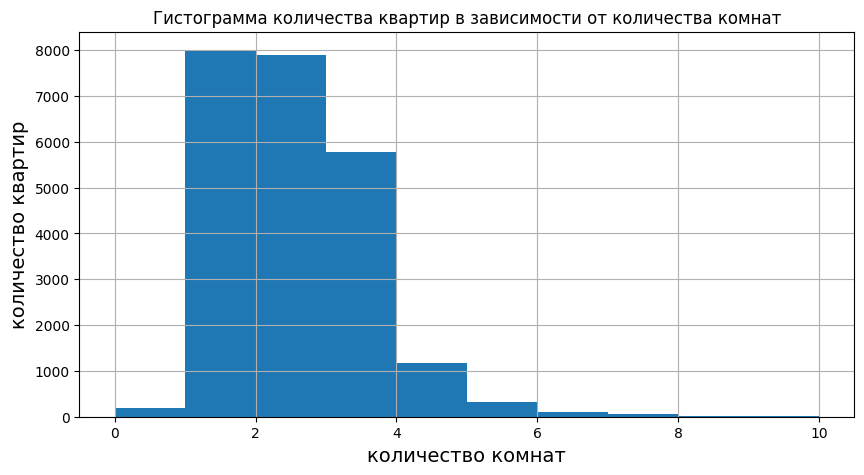

In [52]:
data['rooms'].hist(bins=10, range=(0,10), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от количества комнат")
plt.xlabel('количество комнат', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Количество комнат обычно составляет 1-3, что и видно из гистограммы.

#### Анализ высоты потолков

In [53]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.771283
std          0.989266
min          1.000000
25%          2.600000
50%          2.771283
75%          2.771283
max        100.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'количество квартир')

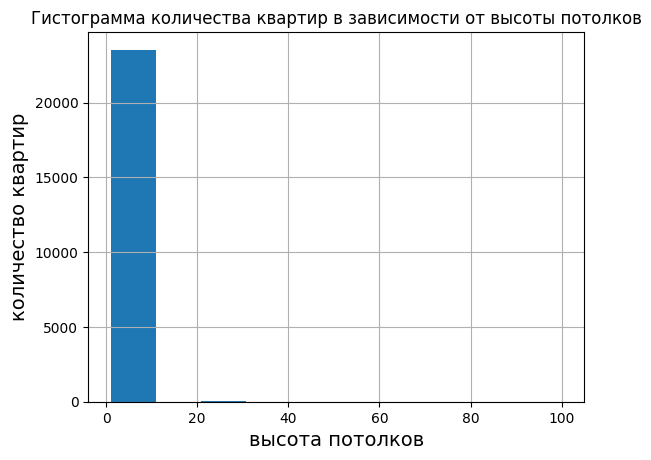

In [54]:
data['ceiling_height'].hist()
plt.title("Гистограмма количества квартир в зависимости от высоты потолков")
plt.xlabel('высота потолков', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Есть какие-то аномальные значения, найдем их и поменяем

In [55]:
data[data['ceiling_height'] > 10]['ceiling_height'].count()

25

In [56]:
data[data['ceiling_height'] > 10]['ceiling_height'].unique()

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  14. ,  20. ,  22.6,  27.5,
        10.3, 100. ])

Так как значения явно слишком большие, а реальные высоты потолков должы быть около 3 метров, разделим имеющиеся значения на 10. Высоты 10.3 и 100 м удалим из таблицы, так как это либо ошибка, либо исключительный объект недвижимости, требующий отдельной оценки.

In [57]:
data = data[(data['ceiling_height'] != 10.3) & (data['ceiling_height'] != 100.0)]

In [58]:
data['ceiling_height'] = data.apply(lambda row:
                                    round(row['ceiling_height']/10) if row['ceiling_height'] > 10
                                    else row['ceiling_height'], axis=1)

In [59]:
data['ceiling_height'].describe()

count    23563.000000
mean         2.744255
std          0.231407
min          1.000000
25%          2.600000
50%          2.771283
75%          2.771283
max          8.300000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'количество квартир')

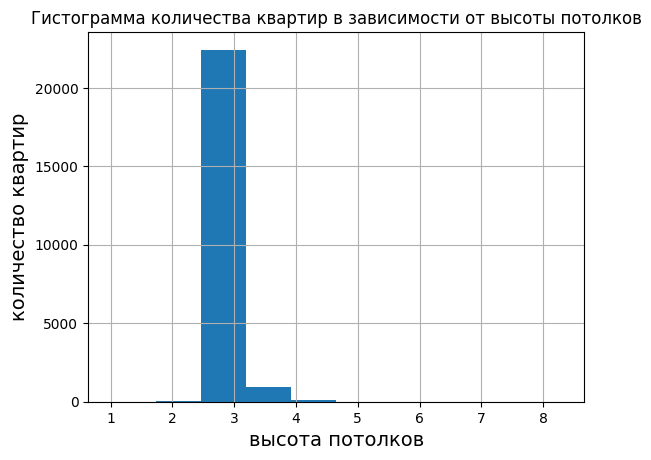

In [60]:
data['ceiling_height'].hist()
plt.title("Гистограмма количества квартир в зависимости от высоты потолков")
plt.xlabel('высота потолков', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

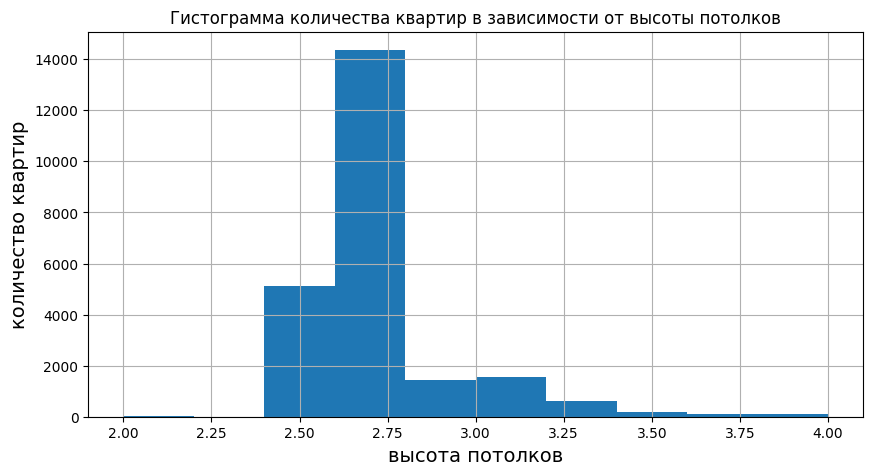

In [61]:
data['ceiling_height'].hist(bins=10, range=(2,4), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от высоты потолков")
plt.xlabel('высота потолков', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Высота потолков обычно составляет около 2.7 м, что соответствует как медиане, так и верхнему(третьему) квартилю.

#### Анализ этажа - первый, последний или другой

In [62]:
data['floor_type'].describe()

count      23563
unique         3
top       другой
freq       17325
Name: floor_type, dtype: object

Text(0, 0.5, 'количество квартир')

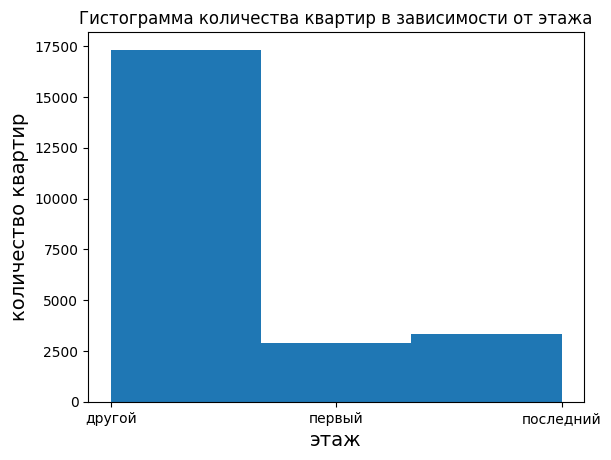

In [63]:
data['floor_type'].hist(bins=3, grid=False)
plt.title("Гистограмма количества квартир в зависимости от этажа")
plt.xlabel('этаж', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

В основном квартиры не на первом и не на последнем этажах.

#### Анализ общего количества этажей

In [64]:
data['floors_total'].describe()

count    23563.000000
mean        10.675890
std          6.594908
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0, 0.5, 'количество квартир')

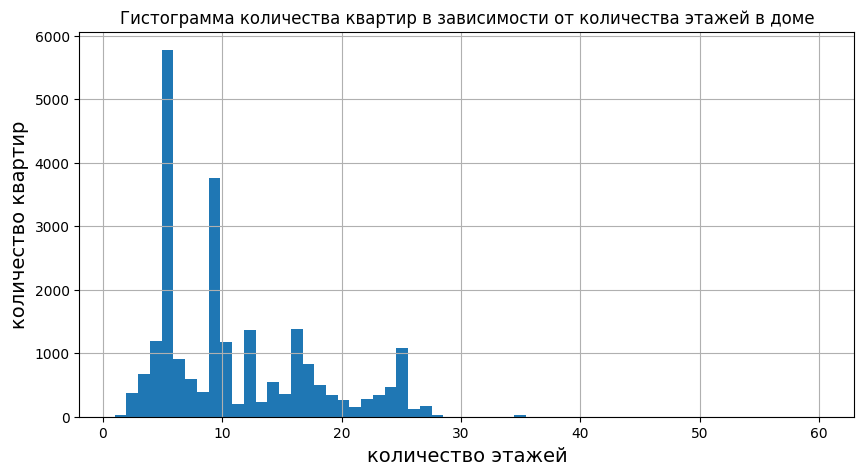

In [65]:
data['floors_total'].hist(bins=60, figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от количества этажей в доме")
plt.xlabel('количество этажей', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

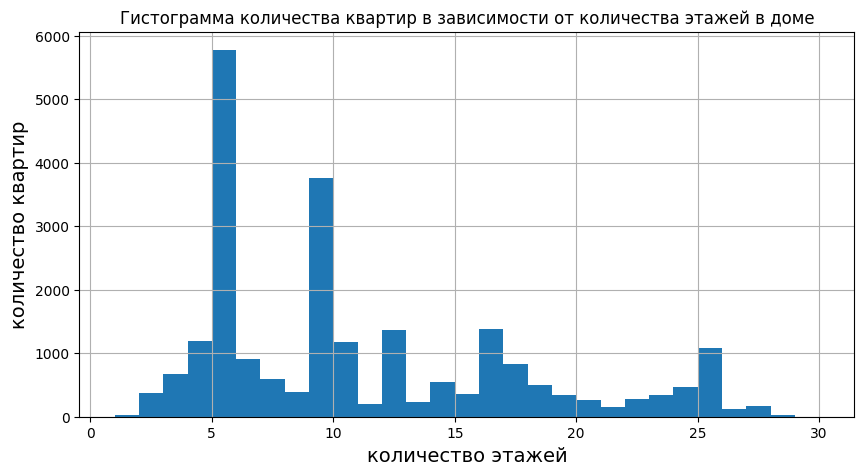

In [66]:
data['floors_total'].hist(bins=29, figsize=(10,5), range=(1,30))
plt.title("Гистограмма количества квартир в зависимости от количества этажей в доме")
plt.xlabel('количество этажей', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Много квратир с 5 или 9 этажами.

#### Анализ расстояния до центра

In [67]:
data['cityCenters_nearest'].describe()

count    18071.000000
mean     14202.286231
std       8624.064227
min        181.000000
25%       9238.000000
50%      13104.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0, 0.5, 'количество квартир')

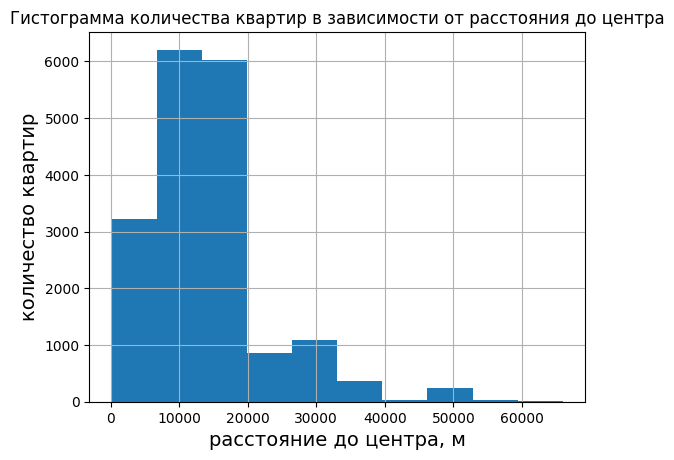

In [68]:
data['cityCenters_nearest'].hist()
plt.title("Гистограмма количества квартир в зависимости от расстояния до центра")
plt.xlabel('расстояние до центра, м', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

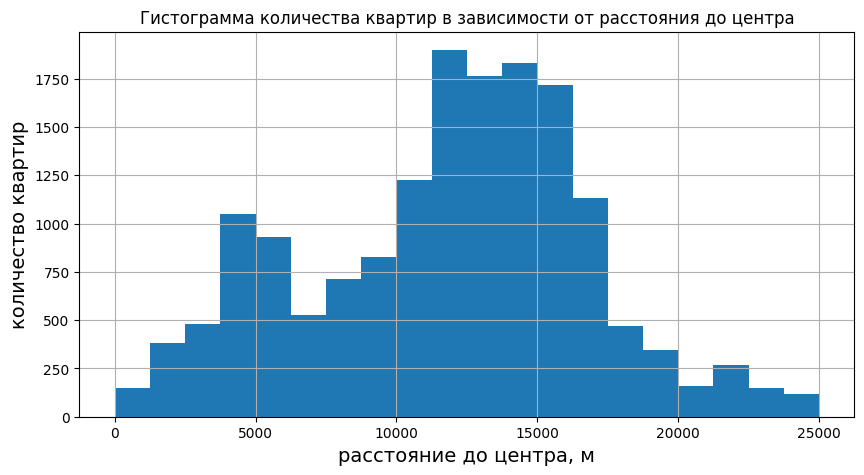

In [69]:
data['cityCenters_nearest'].hist(bins=20, range=(0,25000), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от расстояния до центра")
plt.xlabel('расстояние до центра, м', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Большинство квартир находятся на расстоянии 10-15 км от центра города, но есть и совсем удаленные, например, на 65 км.

#### Анализ расстояния до ближайшего парка

In [70]:
data['parks_nearest'].describe()

count    9177.000000
mean      486.254586
std       320.273574
min         1.000000
25%       313.000000
50%       460.000000
75%       587.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'количество квартир')

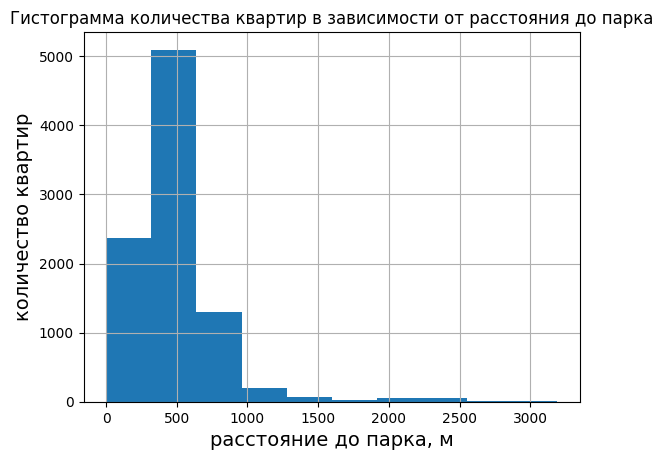

In [71]:
data['parks_nearest'].hist()
plt.title("Гистограмма количества квартир в зависимости от расстояния до парка")
plt.xlabel('расстояние до парка, м', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

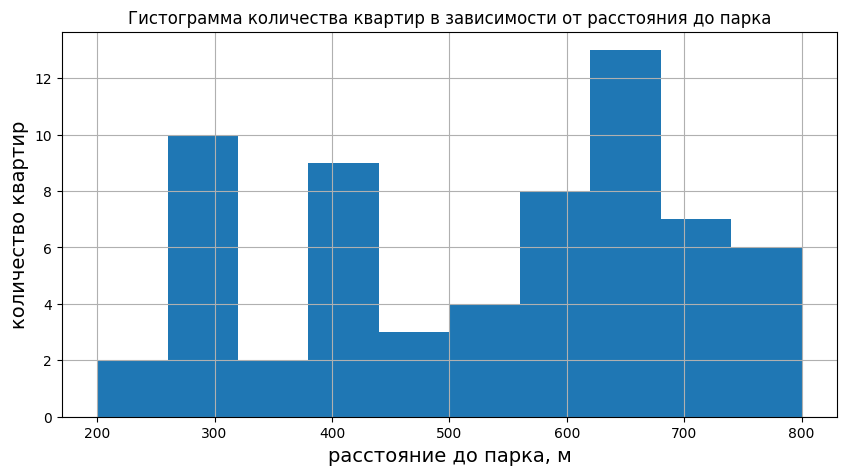

In [72]:
data['cityCenters_nearest'].hist(bins=10, range=(200,800), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от расстояния до парка")
plt.xlabel('расстояние до парка, м', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Парки в основ находятся на расстоянии около 500м от квартиры, но есть и удаленные - больше 3км.

#### Исследование скорости продажи квартиры

In [73]:
data['days_exposition'].describe()

count    20392.000000
mean       180.751520
std        219.740415
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'количество квартир')

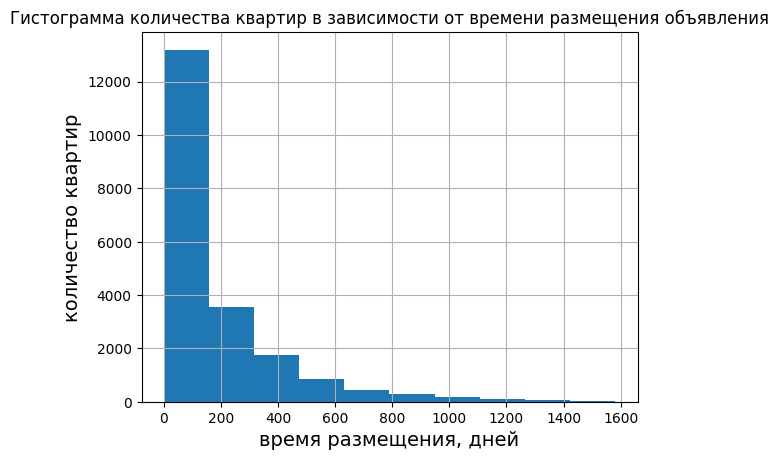

In [74]:
data['days_exposition'].hist()
plt.title("Гистограмма количества квартир в зависимости от времени размещения объявления")
plt.xlabel('время размещения, дней', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Text(0, 0.5, 'количество квартир')

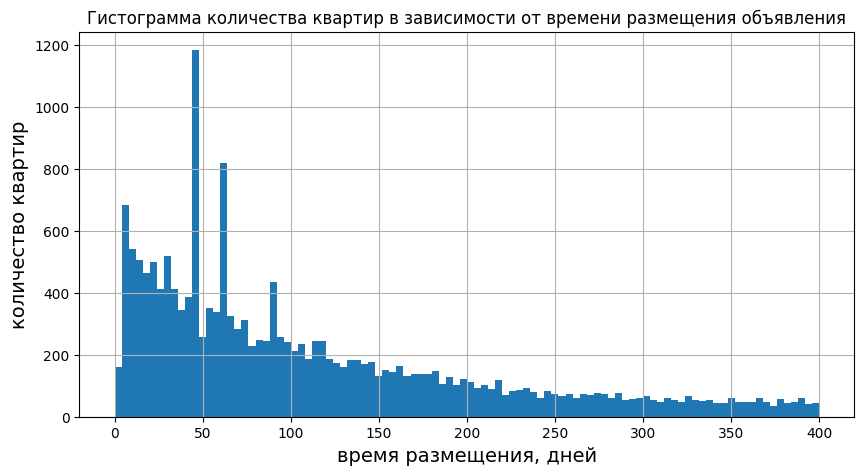

In [75]:
data['days_exposition'].hist(bins=100, range=(0,400), figsize=(10,5))
plt.title("Гистограмма количества квартир в зависимости от времени размещения объявления")
plt.xlabel('время размещения, дней', fontsize=14)
plt.ylabel('количество квартир', fontsize=14)

Вывод

В основном, квартиры продавались довольно быстро - от месяца до 3.
Быстрыми можно считать продажи до месяца, а долгими - дольше 100 дней.
При этом можно увидеть увеличенное количество продаж примерно через месяц - это может быть связано с тем, что перед покупкой квартиры надо оформить документы, посмотреть квартиру, на что уходит время, даже если покупать квартиру не в кредит. Если же оформлять ипотеку, то процесс покупки может быть затянут еще и банком. Скорее всего из-за этого выбросы и появились. Также они могли появиться из-за того, что продавцы могут скидывать цену, если нет спроса, но не сразу, а, например через месяц, что также может сказаться на данной гистограмме.

#### Изучение зависимости цены от различных параметров:

Сначала построим по нему матрицу рассеяния, чтобы взглянуть на некоторые не дискретные параметры.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubp

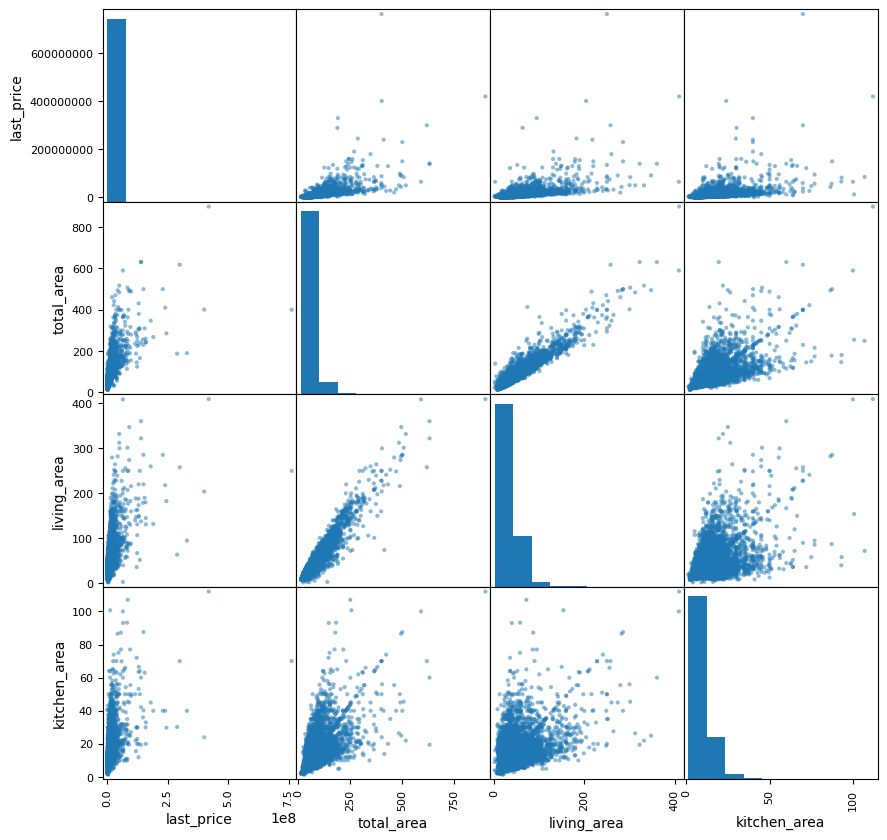

In [76]:
pd.plotting.scatter_matrix(data[['last_price',
                                 'total_area',
                                 'living_area',
                                 'kitchen_area',
                               ]],
                           figsize=(10, 10),
                           grid='True') 

В целом вид графиков похож, но рассмотрим каждый из них отдельно, при этом будем брать не весь диапозон, а только ту часть, где больше всего объявлений. Какую часть брать будем выбирать на основе данных анализа в пунктах 4.1-4.10.

<AxesSubplot:xlabel='total_area'>

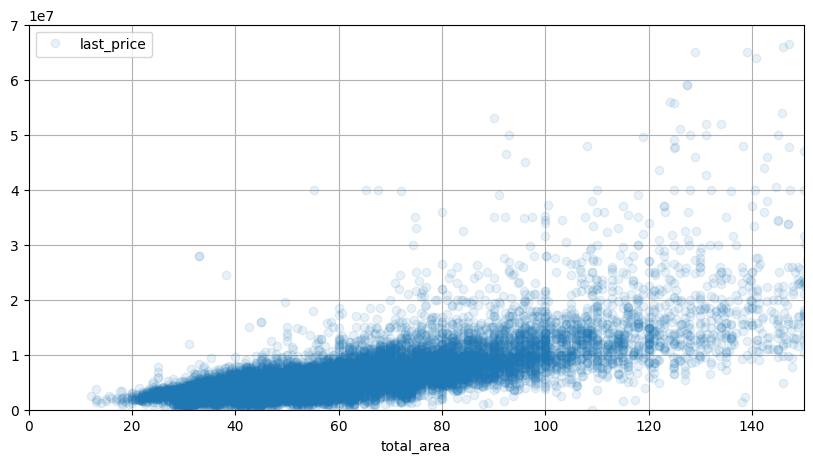

In [77]:
(data.plot(x='total_area',
           xlim=(0,150),
           y='last_price',
           ylim=(0,70000000),
           style='o',
           figsize=(10,5),
           alpha=0.1,
           grid=True)
)

Разобьем площади на группы по 5 м$^2$ для составления более наглядного графика.

<AxesSubplot:xlabel='total_area_round'>

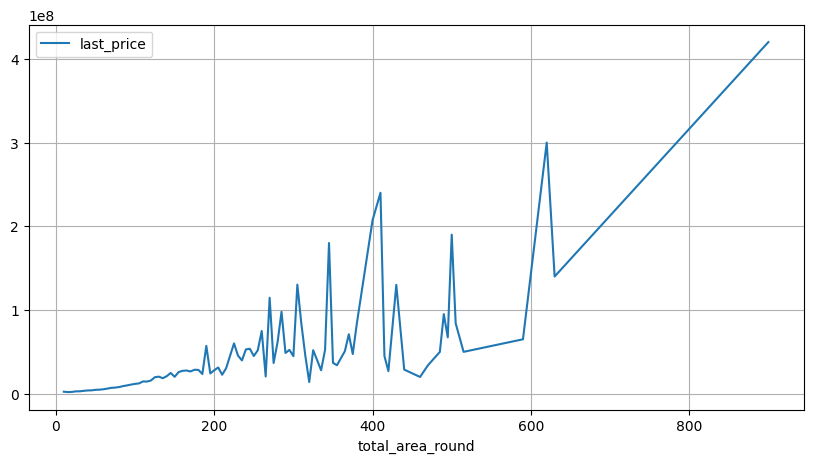

In [78]:
def round_five(x):
    return round(x/5) * 5
data['total_area_round'] = data['total_area'].apply(round_five)
(data.pivot_table(index='total_area_round', values='last_price', aggfunc='mean')
     .plot(figsize=(10,5),
           grid=True)
)

<AxesSubplot:xlabel='living_area'>

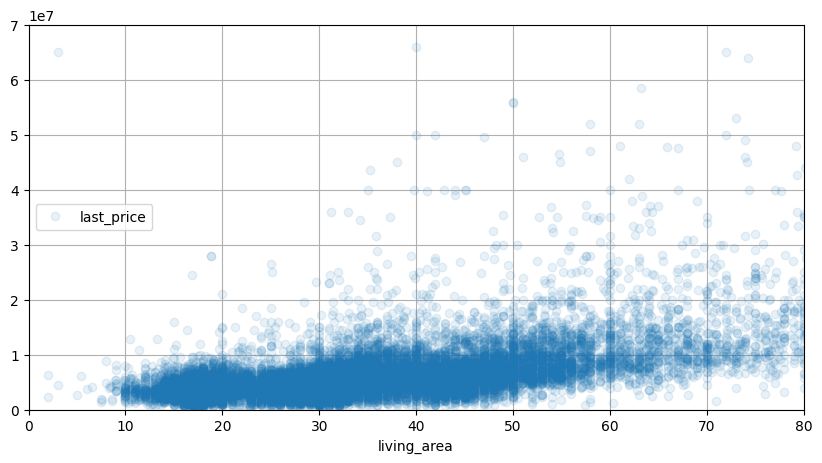

In [79]:
(data.plot(x='living_area',
           xlim=(0,80),
           y='last_price',
           ylim=(0,70000000),
           style='o',
           figsize=(10,5),
           alpha=0.1,
           grid=True)
)

<AxesSubplot:xlabel='living_area_round'>

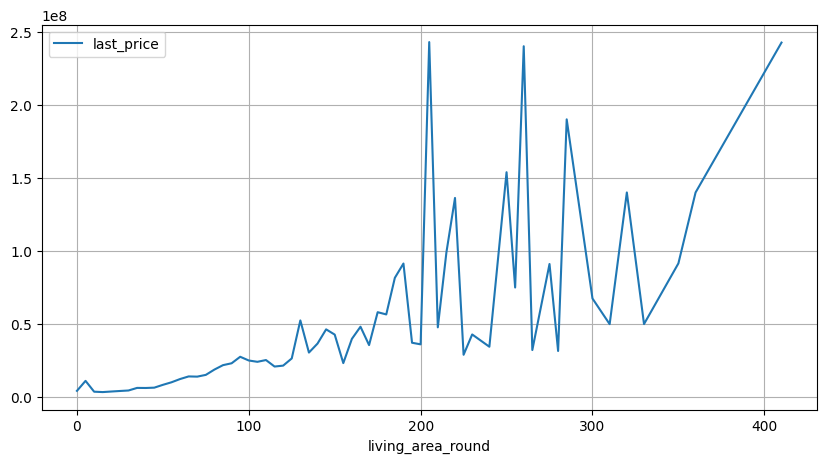

In [80]:
data['living_area_round'] = data['living_area'].apply(round_five)
(data.pivot_table(index='living_area_round', values='last_price', aggfunc='mean')
     .plot(figsize=(10,5),
           grid=True)
)

<AxesSubplot:xlabel='kitchen_area'>

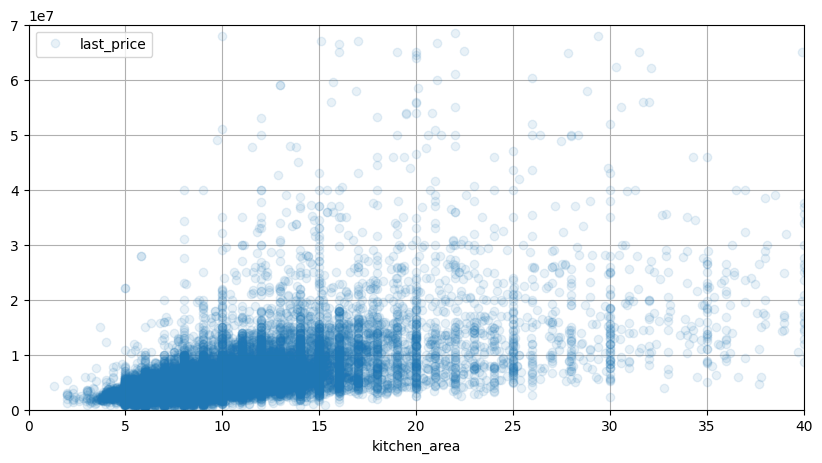

In [81]:
(data.plot(x='kitchen_area',
           xlim=(0,40),
           y='last_price',
           ylim=(0,70000000),
           style='o',
           figsize=(10,5),
           alpha=0.1,
           grid=True)
)

<AxesSubplot:xlabel='kitchen_area_round'>

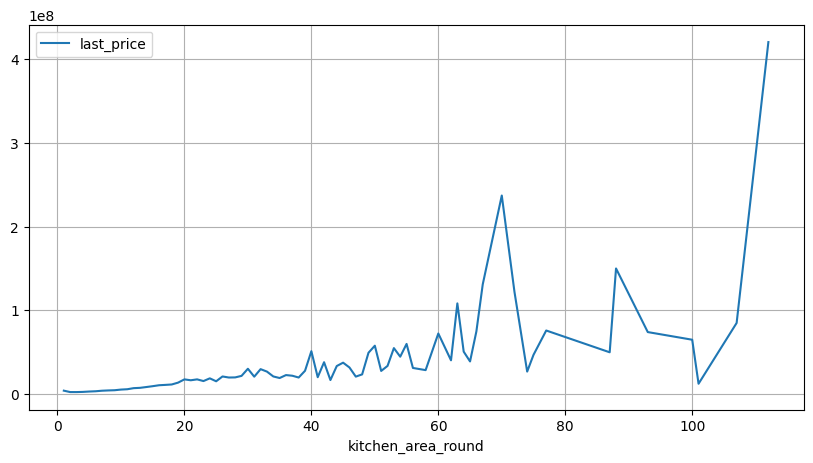

In [82]:
data['kitchen_area_round'] = data['kitchen_area'].apply(round)
(data.pivot_table(index='kitchen_area_round', values='last_price', aggfunc='mean')
     .plot(figsize=(10,5),
           grid=True)
)

<AxesSubplot:xlabel='rooms'>

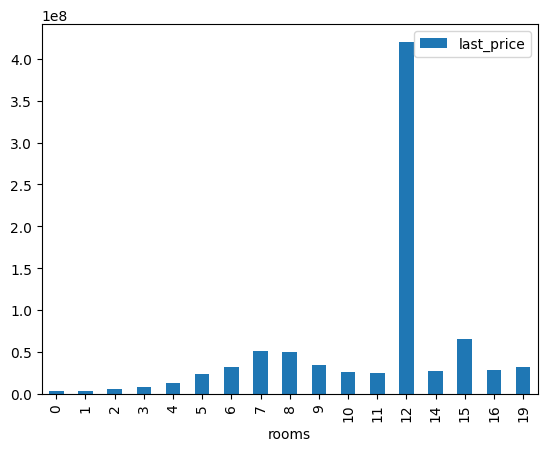

In [83]:
(data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
    .plot(kind='bar')
)

In [84]:
data[data['rooms'] == 12]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_one_meter,day_of_week_publication,month_of_publication,year_of_publication,floor_type,city_center_km,total_area_round,living_area_round,kitchen_area_round
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,106.0,466666.666667,2,12,2017,последний,8.0,900,410,112


<AxesSubplot:xlabel='floor_type'>

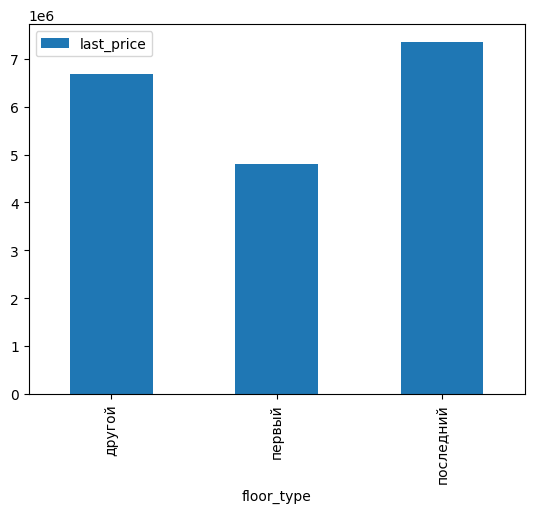

In [85]:
(data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
     .plot(kind='bar')
)

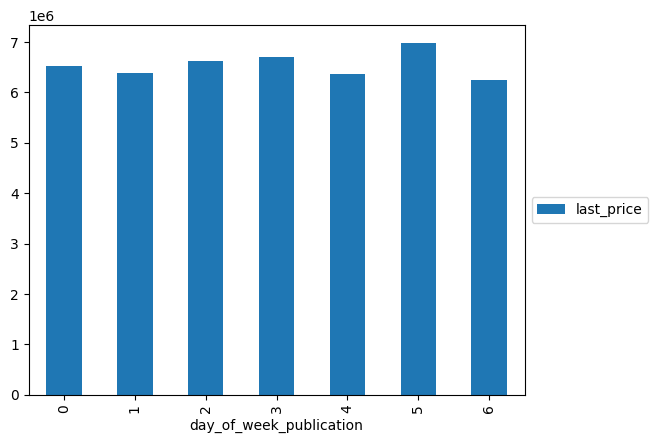

In [86]:
(data.pivot_table(index='day_of_week_publication', values='last_price', aggfunc='mean')
                 .plot(kind='bar')
)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<AxesSubplot:xlabel='month_of_publication'>

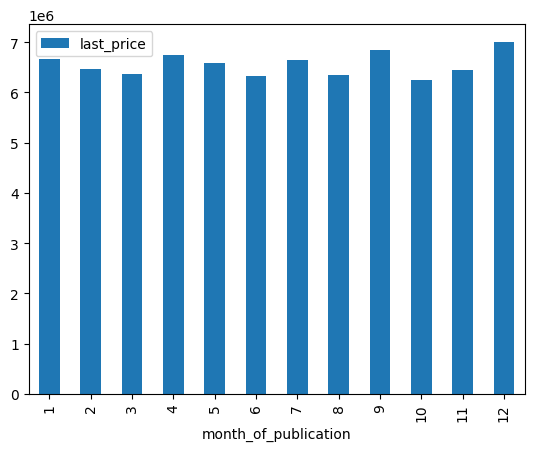

In [87]:
(data.pivot_table(index='month_of_publication', values='last_price', aggfunc='mean')
                 .plot(kind='bar')
)

<AxesSubplot:xlabel='year_of_publication'>

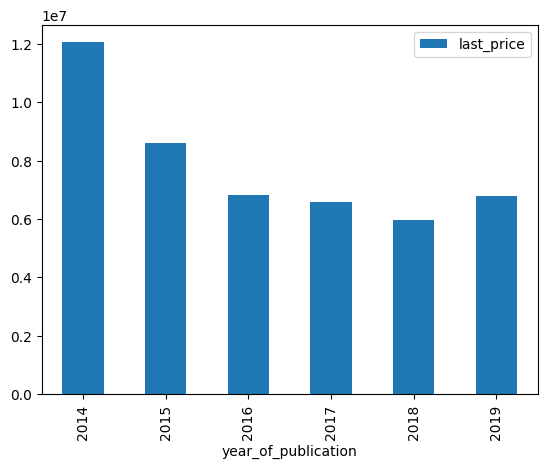

In [88]:
(data.pivot_table(index='year_of_publication', values='last_price', aggfunc='mean')
                 .plot(kind='bar')
)

#### Вывод о зависимости цены

Цены на квартиры растут пропорционально увеличению площади помещений, что четко видно при общей площади до 200 $м^2$. При больших площадях, цена хоть и растет, но сильно меняется, так как объектов с большой площадью продают меньше и цена может зависеть не только от общей площади. Аналогично по жилой площади, так как она напрямую зависит от общей площади, поэтому их графики ожидаемо похожи. Тоже относится и к площади кухни. Количество комнат также влияет на цену, цена растет при росте количества комнат до 7, а дальше падает. Это может быть связано с другой планировкой зданий при таком большом количестве комнат. Виден пик на 12 комнатах, но так как с таким количество комнат было продано всего одно жилье, его нельзя рассматривать для наблюдений. Дороже всего продавались квартиры на последнем этаже, хуже - на первом. Зависимость от дня публикации очень слабая, нельзя выделить какой-либо день недели как лучший или худший. Если смотреть на месяца, то немного выделятся декабрь, при этом в октябре цена меньше всего. По годам стоимость квартир была наибольшей в 2014, затем снижалась до 2018 года. После начался небольшой рост.

#### Расчет средней цены

In [89]:
data['medium_price_per_meter'] = data['last_price'] / data['total_area']

In [90]:
data_price_pivot = data.pivot_table(index='locality_name',
                                    values='medium_price_per_meter',
                                    aggfunc='mean').sort_values(by='medium_price_per_meter')

In [91]:
print(data_price_pivot.head(10))
print(data_price_pivot.tail(10))

                         medium_price_per_meter
locality_name                                  
деревня Старополье                 11206.221198
поселок станции Свирь              11481.481481
деревня Вахнова Кара               11688.311688
деревня Выскатка                   12335.480902
поселок Совхозный                  12629.129129
деревня Малая Романовка            12724.550898
поселок Тесово-4                   12931.034483
деревня Сижно                      13709.677419
деревня Ям-Тесово                  13711.553373
поселок Житково                    14956.275202
                   medium_price_per_meter
locality_name                            
Мурино                       92722.708914
поселок Левашово             96997.690531
деревня Мистолово            98549.976709
Кудрово                     100134.543715
поселок Лисий Нос           100660.814239
Сестрорецк                  101757.616875
Пушкин                      103125.819291
поселок Репино              104238.614786
Санк

Вывели 10 самых дорогих и самых дешевых населенных пунктов по соотношению цены квартиры к площади.

#### Зависимость цены от расстояния до центра в Санкт-Петербурге

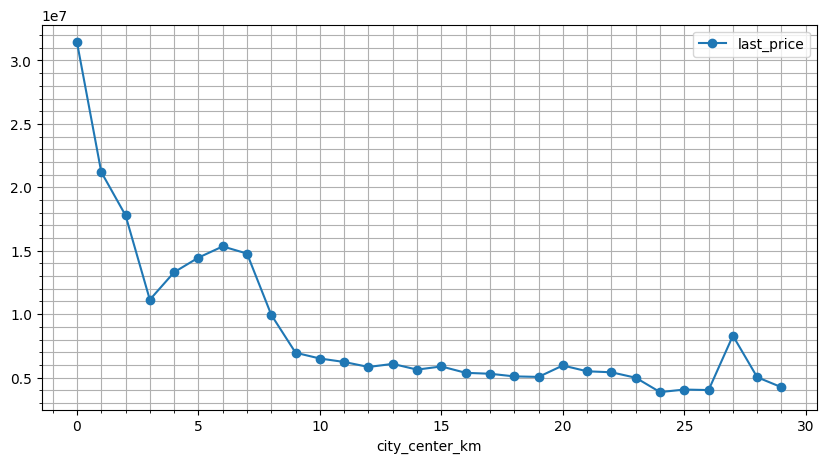

In [92]:
ax = (data.query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='city_center_km', values='last_price', aggfunc="mean")
     .plot(style='o-', figsize=(10,5))
)
ax.minorticks_on()
ax.grid(visible=True, which='both')

Квартиры, находящиеся близко к центру города, сильно дороже всех остальных. На расстоянии более 10 км зависимость становиться почти горизонтальной, но небоьшое снижение наблюдать все же можно. На расстоянии 27 наблюдается подъем стоимости. Это может быть связано с наличием какого-либо хорошо обустроеного района.

### Общий вывод

Общий вывод:

В ходе работы были получены данные о стоимость квартир и различные данные по этим квартирам, в том числе с помощью геосервисов. В ходе предобработки данных было удалено несколько строк с отсутствующими данными. При анализе данных найдены строки с аномальными значениями, которые были либо откорректированы, либо удалены. Выполнен поиск и замена дубликатов. Проанализировано распределение площадей, стоимости, количестве комнат в продаваемых квартирах, и некоторые другие параметры. Построены графики зависимости между ценой и площадью,этажом, датой размещения. В конце проанализировано зависимость стоимость квартиры для Санк-Петербурга в зависимости от расстояния до его центра. Также выделены квартиры с наибольшей и наименьшей стоимостью квадратного метра в зависимости от населенного пункта.

В целом распределение ожидаемое - цены квартиры увеличивается при увеличении площади, уменьшении расстояния от центра. Также дороже квартиры на последнем этаже, а на первом - самые дешевые. Самые дорогие квартиры продавались в 2014 году, далее цены на них снижались. По месяцам изменения небольшие, но чуть дороже остальных покупка обходилась в декабре. Продавались квартиры обычно в течении мясяца - трех, быстрой можно считать продажу за месяц.